In [108]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df = pd.read_csv("aggregated_3upd_weekdays.csv")
# do not look at rows with empty mood or target
df = df[np.isfinite(df['mood'])]
df = df[np.isfinite(df['target'])]
users = df['id'].unique()
attrs = list(df.columns.values)
_ = attrs.pop(0)

In [110]:
# fill empty cells with mean attr value per user
df_collection = {}
for id in users:
    for attr in attrs:
        df.loc[df.id == id, attr] = df.loc[df.id == id, attr].fillna(df.loc[df.id == id, attr].mean())

In [111]:
# Pearson corellation of attributes with target
# correlation of target with itself
for attr in attrs:
    print(attr + ': ', df['target'].corr(df[attr]))

mood:  0.484284483567837
circumplex.arousal:  0.038653272329530544
circumplex.valence:  0.24181901102723893
activity:  0.10376382690279379
screen:  -0.0634253024222311
call:  -0.02403992574587262
sms:  -0.08836372396434984
appCat.builtin:  0.0891755055121812
appCat.communication:  -0.017297561115800948
appCat.entertainment:  -0.06723341694750817
appCat.finance:  0.00020303500307895157
appCat.game:  0.15853336756577902
appCat.office:  -0.0021651619006521974
appCat.other:  0.03513726440987047
appCat.social:  -0.06582635508169778
appCat.travel:  0.01539134557153911
appCat.unknown:  0.04419758526200624
appCat.utilities:  -0.06247977112883852
appCat.weather:  -0.047959997690017415
target:  0.9999999999999999
smstime:  0.09766333636308408
calltime:  0.08332233527975663
weekday_0:  -0.0389888988504484
weekday_1:  -0.049134432950961274
weekday_2:  -0.04747336541701468
weekday_3:  -0.02536647343706561
weekday_4:  0.01016071353997752
weekday_5:  0.1255124652879255
weekday_6:  0.02272796743079358

In [12]:
df.to_csv("aggregated_3upd_filled_weekdays.csv")

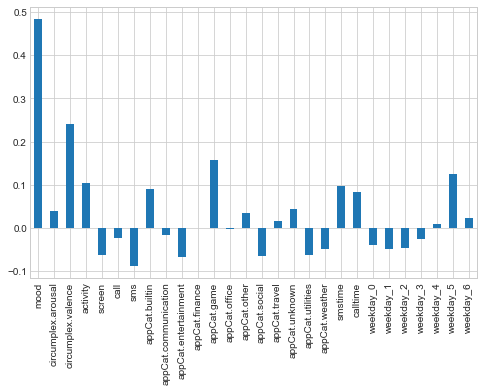

In [122]:
df.corr()['target'].drop('target').plot.bar(figsize=(8,5))

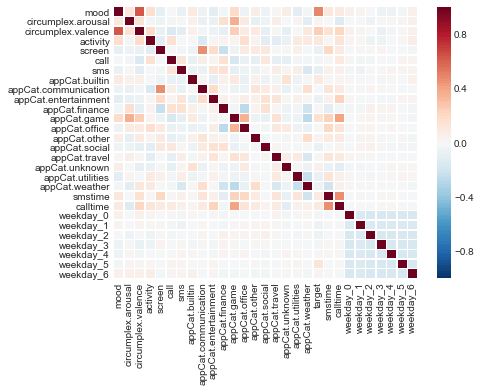

In [104]:
# Create a correlation plot
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 2)
sns.heatmap(df.corr().drop('target'), 
            vmin=-1, vmax=1, 
            xticklabels=True,
            yticklabels=True,
            cmap=sns.color_palette("RdBu_r", 100), 
            linewidths=.5);